2023-01-19 12:16:52.980507: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 12:16:53.038527: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-19 12:16:53.040816: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-19 12:16:53.040822: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

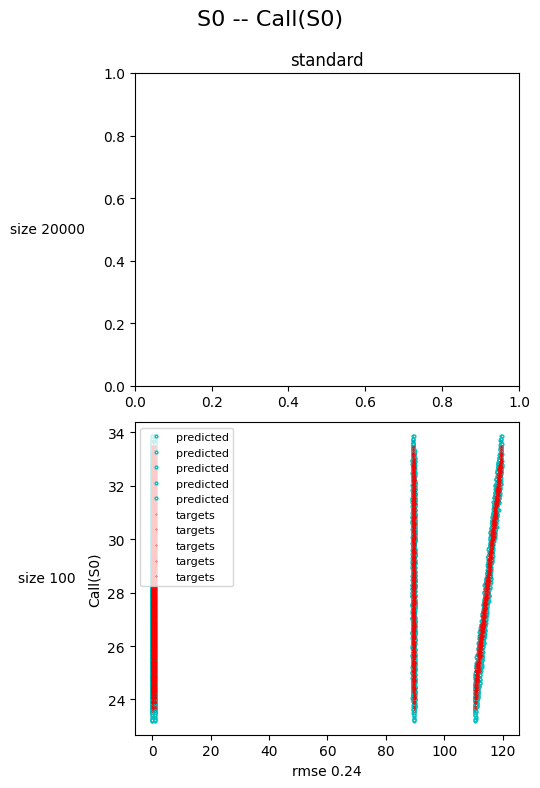

In [1]:
### Copy of Main.py as a juypter notebook to visualize results

###
### 0. Import packages and references
###
### Import framework
import os
mainDirectory = os.path.abspath(os.path.join(os.getcwd(),'..', '..','..'))
packageFile = os.path.abspath(os.path.join(mainDirectory, 'montecarlolearning', 'packages.py'))
exec(open(packageFile).read())

###
### 1. Training data
###
#from CDF import *
generator = GBM_5d(GBM_5d_Case.Standard,noiseVariance = 0.0)
sizes = [20000,100] # [sizePerTrainingStep, trainingSteps]
nTest = 2000 # Test set size
dataSeed = 1
weightSeed = 1

###
### 2. Set Nueral network structure / Hyperparameters
### 

hiddenNeurons = 50                     # we use equal neurons for each hidden layer
hiddenLayers = 2                      # amount of hidden layers
activationFunctionsHidden = tf.nn.sigmoid  # activation functions of hidden layers
learning_rate_schedule=[
    (0.0, 0.001), 
    (0.333, 0.0001),
    (0.666, 0.0001)
    ] 
activationFunctionOutput = tf.nn.sigmoid
batches_per_epoch = 1          # (min for TrainingMethod.GenerateDataDuringTraining is 1)
###
### 3. Train network
###

trainingMethod = TrainingMethod.GenerateDataDuringTraining
xTest, yTest, yPredicted = train_and_test(generator, sizes, nTest, dataSeed, None, weightSeed, hiddenNeurons, hiddenLayers, activationFunctionsHidden, trainingMethod = trainingMethod, batches_per_epoch = batches_per_epoch,learning_rate_schedule=learning_rate_schedule,activationFunctionOutput=activationFunctionOutput)
    
###
### 3. Study results
###   

# show predicitions
plot_results("S0", yPredicted, xTest, "x", "Call(S0)", yTest, sizes, True, False, None, trainingMethod)

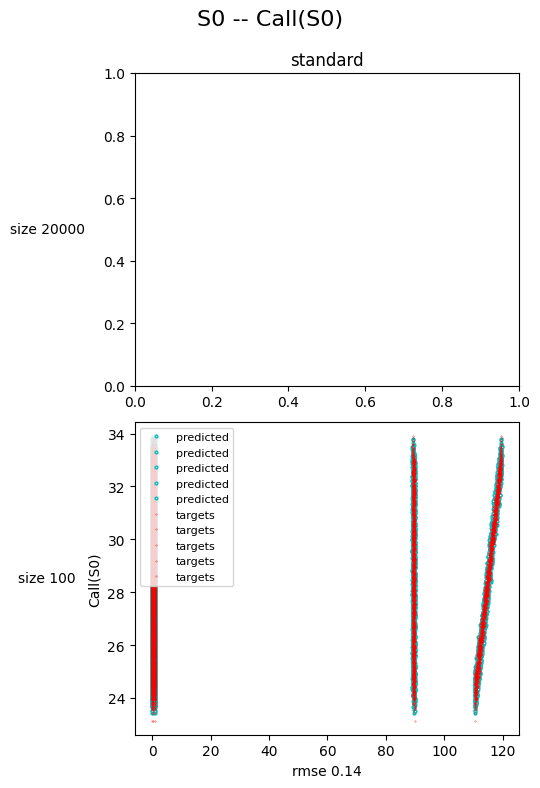

In [2]:
#changes
generator = GBM_5d(GBM_5d_Case.ClosedSolution,noiseVariance = 0.0)

###
### 3. Train network
###

trainingMethod = TrainingMethod.GenerateDataDuringTraining
xTest, yTest, yPredicted = train_and_test(generator, sizes, nTest, dataSeed, None, weightSeed, hiddenNeurons, hiddenLayers, activationFunctionsHidden, trainingMethod = trainingMethod, batches_per_epoch = batches_per_epoch,learning_rate_schedule=learning_rate_schedule,activationFunctionOutput=activationFunctionOutput)
    
###
### 3. Study results
###   

# show predicitions
plot_results("S0", yPredicted, xTest, "x", "Call(S0)", yTest, sizes, True, False, None, trainingMethod)